<a href="https://colab.research.google.com/github/RifkiNS/Data-Science-Project/blob/main/Road_Accident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/RifkiNS/Data-Science-Project.git

Cloning into 'Data-Science-Project'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (9/9), 412.44 KiB | 3.03 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
accident_fatal = pd.read_csv('accident_fatal.csv')
dark_light = pd.read_csv('dark-light_accident.csv')
data_accident = pd.read_csv('data_accident.csv')
disctrit_area = pd.read_csv('disctrit-area_accident.csv')
index_accident = pd.read_csv('index_acccident.csv')
lat_accident = pd.read_csv('latitutde_accident.csv')
long_accident = pd.read_csv('longitutde_accident.csv')
number_accident = pd.read_csv('number-vehicules_accidentes.csv')
number_casulites = pd.read_csv('number_of_casualites.csv')
road_surface = pd.read_csv('road-surface-condictions_accident.csv')
road_type = pd.read_csv('road_type- corrigir G-sheets.csv')
ubar_rural = pd.read_csv('ubar_rural_area.csv')
vehicule_type = pd.read_csv('vehicule_type.csv')
wheather_condictions = pd.read_csv('wheather_condictions_accident.csv')

In [ ]:
disctrit_area.head( )

,District_Area
0,Adur
1,Adur
2,Adur
3,Adur
4,Adur


In [5]:
df = pd.merge(accident_fatal, dark_light, left_index=True, right_index=True)
df.head()

,Accident_Severity,Light_Conditions
0,Fatal,Darkness - lights unlit
1,Fatal,Darkness - lights unlit
2,Fatal,Darkness - lights unlit
3,Fatal,Darkness - lights unlit
4,Fatal,Darkness - lights unlit


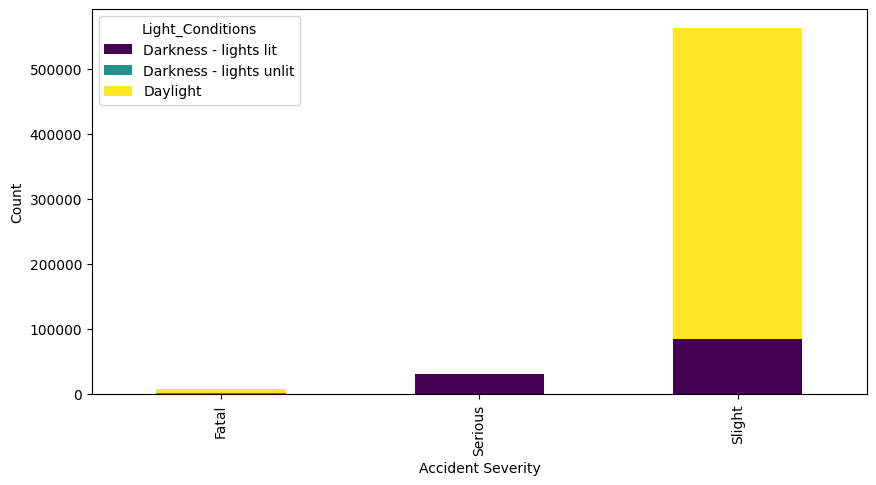

In [6]:
corr_light_and_sever = df.groupby(['Accident_Severity', 'Light_Conditions']).size().unstack()

corr_light_and_sever.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10,5))
plt.xlabel('Accident Severity')
plt.ylabel('Count')

plt.show()

In [7]:
df = pd.merge(data_accident, accident_fatal, left_index=True, right_index=True)
df.head()

,Accident_Date,Accident_Severity
0,2019-01-08,Fatal
1,2019-01-18,Fatal
2,2019-01-29,Fatal
3,2019-02-10,Fatal
4,2019-02-09,Fatal


In [8]:
df['Accident_Date'] = pd.to_datetime(df['Accident_Date'])

df['Year'] = df['Accident_Date'].dt.year

In [ ]:
df['Year']

0         2019
1         2019
2         2019
3         2019
4         2019
          ... 
624995    2022
624996    2022
624997    2022
624998    2022
624999    2022
Name: Year, Length: 625000, dtype: int64

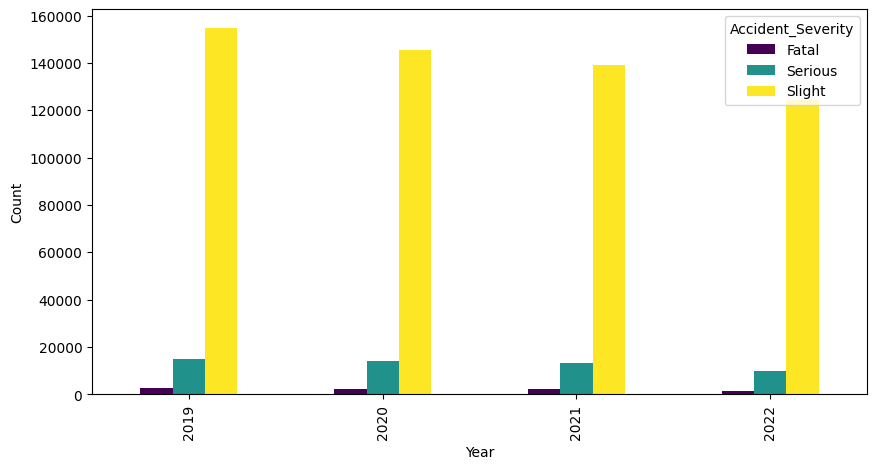

In [9]:
fatal = df.groupby(['Year', 'Accident_Severity']).size().unstack()

fatal.plot(kind='bar', stacked=False, colormap='viridis', figsize=(10,5))
plt.xlabel('Year')
plt.ylabel('Count')

plt.show()

In [10]:
df = df.join(number_accident, how='outer')
df.head()

,Accident_Date,Accident_Severity,Year,Number_of_Vehicles
0,2019-01-08,Fatal,2019.0,1
1,2019-01-18,Fatal,2019.0,1
2,2019-01-29,Fatal,2019.0,1
3,2019-02-10,Fatal,2019.0,1
4,2019-02-09,Fatal,2019.0,1


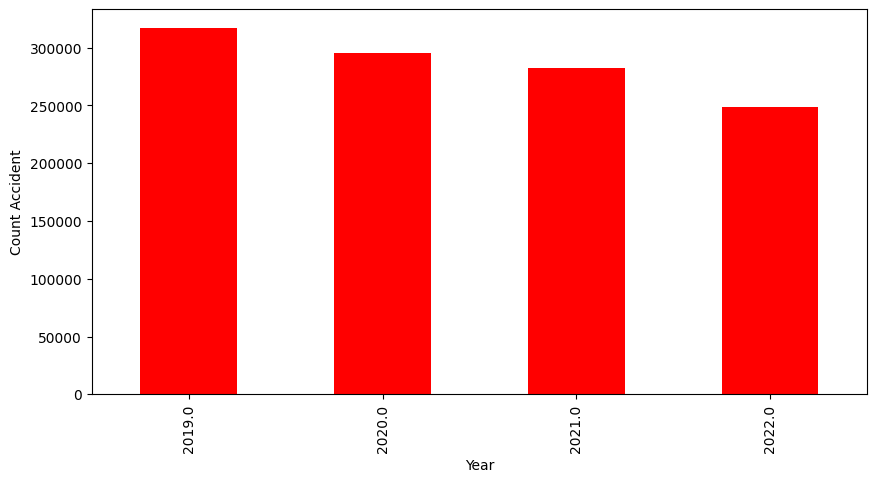

In [11]:
accident_rate = df.groupby('Year')['Number_of_Vehicles'].sum().sort_values(ascending=False)

accident_rate.plot(kind='bar', colormap='hsv', figsize=(10,5))
plt.xlabel('Year')
plt.ylabel('Count Accident')

plt.show()

In [12]:
df = pd.merge(vehicule_type, number_casulites, left_index=True, right_index=True)
df.head()

,Vehicle_Type,Number_of_Casualties
0,Minibus (8 - 16 passenger seats),7
1,Agricultural vehicle,6
2,Agricultural vehicle,6
3,Agricultural vehicle,6
4,Minibus (8 - 16 passenger seats),6


In [ ]:
df.Vehicle_Type.value_counts()

Car                                      497986
Van / Goods 3.5 tonnes mgw or under       34159
Bus or coach (17 or more pass seats)      25877
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13293
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Motorcycle over 125cc and up to 500cc      4350
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: Vehicle_Type, dtype: int64

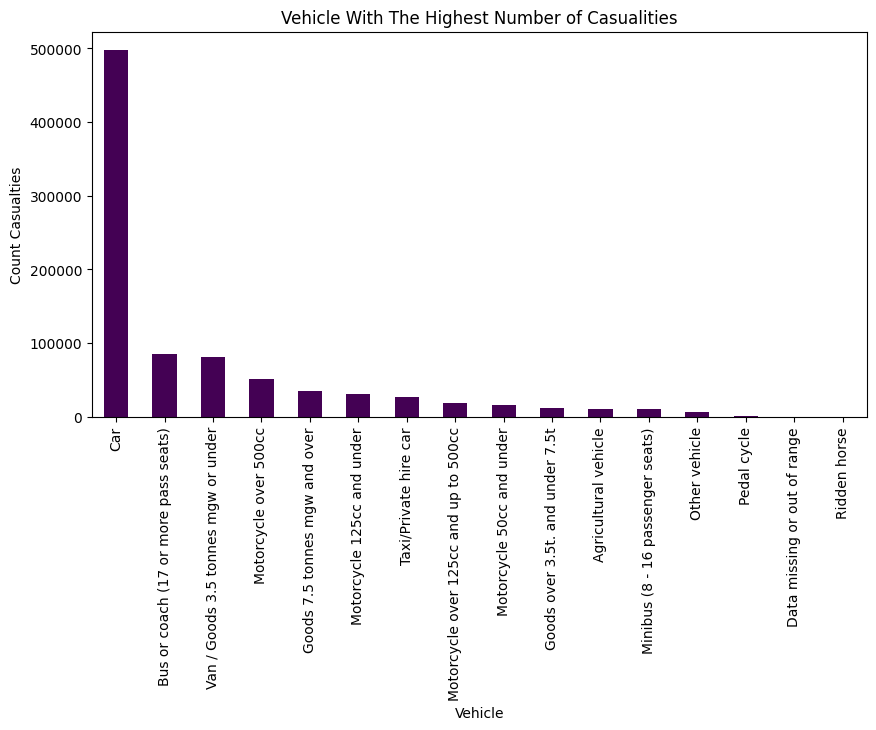

In [13]:
casualites = df.groupby('Vehicle_Type') ['Number_of_Casualties'].sum().sort_values(ascending=False)

casualites.plot(kind='bar', stacked=False, colormap='viridis', figsize=(10,5))
plt.title('Vehicle With The Highest Number of Casualities')
plt.xlabel('Vehicle')
plt.ylabel('Count Casualties')

plt.show()

In [14]:
df = pd.merge(df, number_accident, left_index=True, right_index=True)
df.head()

,Vehicle_Type,Number_of_Casualties,Number_of_Vehicles
0,Minibus (8 - 16 passenger seats),7,1
1,Agricultural vehicle,6,1
2,Agricultural vehicle,6,1
3,Agricultural vehicle,6,1
4,Minibus (8 - 16 passenger seats),6,1


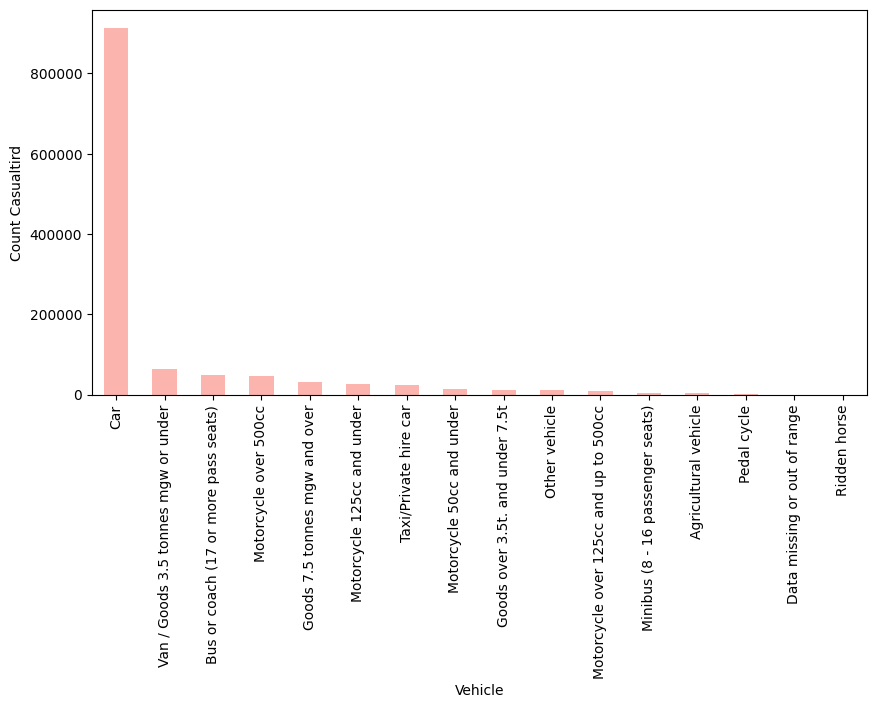

In [15]:
accident = df.groupby('Vehicle_Type')['Number_of_Vehicles'].sum().sort_values(ascending=False)

accident.plot(kind='bar', stacked=False, colormap='Pastel1', figsize=(10,5))
plt.xlabel('Vehicle')
plt.ylabel('Count Casualtird')

plt.show()

In [16]:
df = pd.merge(vehicule_type, number_accident, left_index=True, right_index=True)
df.head()

,Vehicle_Type,Number_of_Vehicles
0,Minibus (8 - 16 passenger seats),1
1,Agricultural vehicle,1
2,Agricultural vehicle,1
3,Agricultural vehicle,1
4,Minibus (8 - 16 passenger seats),1


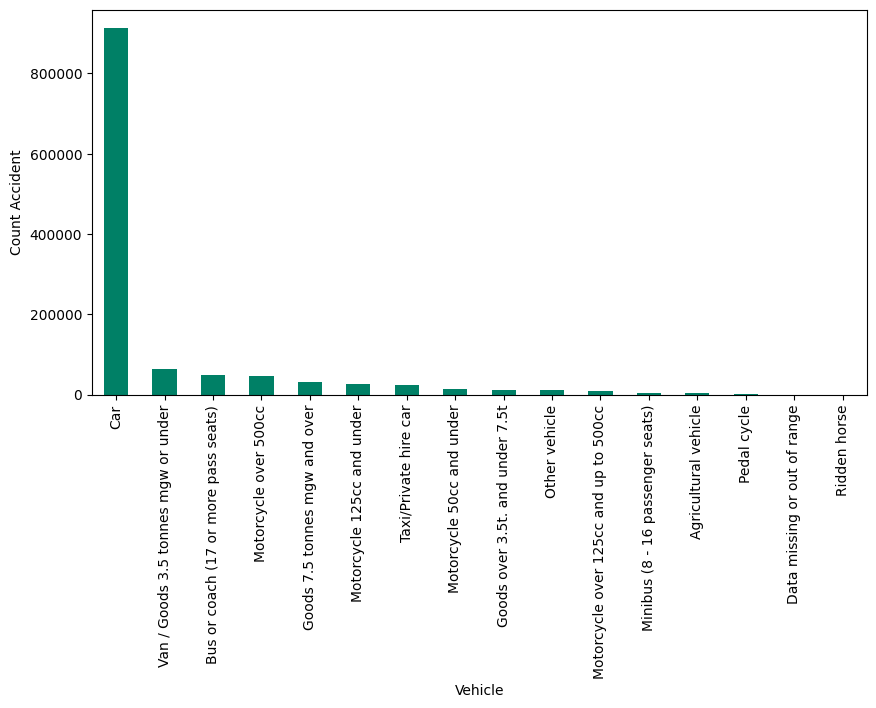

In [17]:
accident = df.groupby('Vehicle_Type')['Number_of_Vehicles'].sum().sort_values(ascending=False)

accident.plot(kind='bar', colormap='summer', figsize=(10,5))
plt.xlabel('Vehicle')
plt.ylabel('Count Accident')

plt.show()

In [18]:
df = pd.merge(accident_fatal, wheather_condictions, left_index=True, right_index=True)
df.head()

,Accident_Severity,Weather_Conditions
0,Fatal,Snowing + high winds
1,Fatal,Snowing + high winds
2,Fatal,Snowing + high winds
3,Fatal,Snowing + high winds
4,Fatal,Snowing + high winds


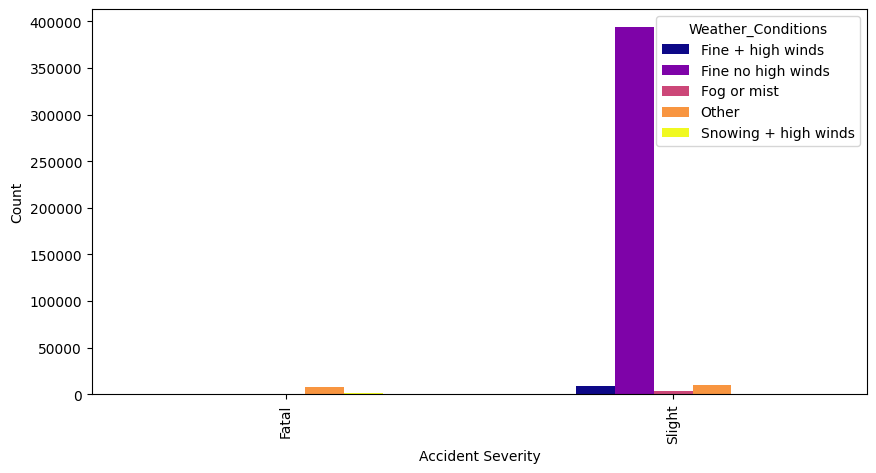

In [19]:
wc = df.groupby(['Accident_Severity', 'Weather_Conditions']).size().unstack()

wc.plot(kind='bar', stacked=False, colormap='plasma', figsize=(10,5))
plt.xlabel('Accident Severity')
plt.ylabel('Count')

plt.show()

In [20]:
df = pd.merge(lat_accident, long_accident,  left_index=True, right_index=True)


In [ ]:
df.head()

,Latitude,Longitude,Urban_or_Rural_Area
0,50.820746,-0.325025,Unallocated
1,50.831465,-0.295104,Unallocated
2,50.827024,-0.323807,Unallocated
3,50.839773,-0.303607,Rural
4,50.847946,-0.284417,Rural


In [21]:
df = df.join(accident_fatal, how='outer')
df

,Latitude,Longitude,Accident_Severity
0,50.820746,-0.325025,Fatal
1,50.831465,-0.295104,Fatal
2,50.827024,-0.323807,Fatal
3,50.839773,-0.303607,Fatal
4,50.847946,-0.284417,Fatal
...,...,...,...
660664,NaN,NaN,Serious
660665,NaN,NaN,Serious
660666,NaN,NaN,Serious
660667,NaN,NaN,Serious


In [22]:
road = df.groupby(['Accident_Severity', 'Road_Type']).size().unstack()

road.plot(kind='bar', stacked=False, colormap='cividis', figsize=(10,5))
plt.xlabel('Accident Saveirty')
plt.ylabel('Count')

plt.show()

KeyError: 'Road_Type'

In [23]:
df = pd.merge(number_casulites, ubar_rural, left_index=True, right_index=True)
df.head()

,Number_of_Casualties,Urban_or_Rural_Area
0,7,Unallocated
1,6,Unallocated
2,6,Unallocated
3,6,Rural
4,6,Rural


In [24]:
 df['non_Unallocated']= df['Urban_or_Rural_Area'].where(df['Urban_or_Rural_Area'] != 'Unallocated')

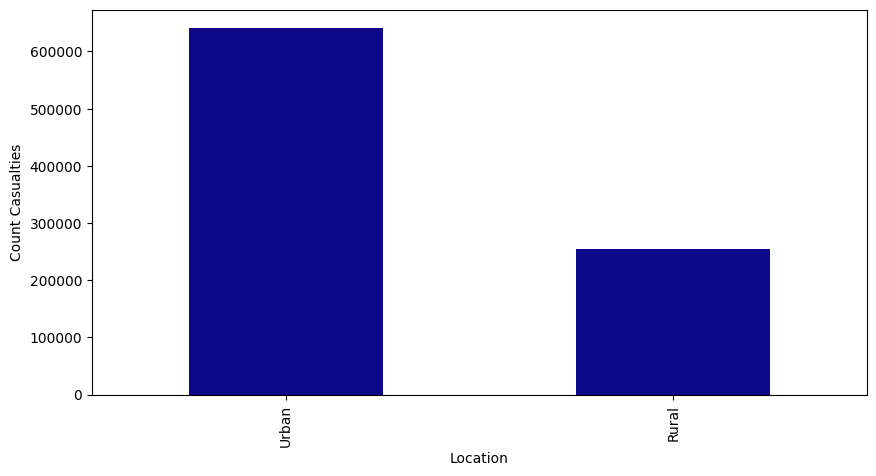

In [25]:
location = df.groupby('non_Unallocated')['Number_of_Casualties'].sum().sort_values(ascending=False)

location.plot(kind='bar', colormap='plasma', figsize=(10,5))
plt.xlabel('Location')
plt.ylabel('Count Casualties')
plt.show()